<a href="https://colab.research.google.com/github/thallamsaithrishool/ADM_LAB/blob/main/ADM_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [47]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)
data_with_outliers=np.concatenate([data,outliers])
display(data,outliers)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

array([7.08705502, 6.11053905, 5.59932684, 6.68807586, 9.71454852])

In [14]:
df=pd.DataFrame(data_with_outliers,columns=['Value'])

In [38]:
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
display(IQR, lower_bound, upper_bound)


1.1739638180818406

-2.3232332563637335

2.372622015963629

In [39]:
outliers_iqr=[(df['Value']<lower_bound)|(df['Value']>upper_bound)]
display(outliers_iqr)

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 100     True
 101     True
 102     True
 103     True
 104     True
 Name: Value, Length: 105, dtype: bool]

In [41]:
z_scores=stats.zscore(df['Value'])
outliers_zscore=df[np.abs(z_scores)>3]
display(z_scores,outliers_zscore)


,Value
0,0.145800
1,-0.209754
2,0.230337
3,0.720481
4,-0.263446
...,...
100,3.836033
101,3.289237
102,3.002986
103,3.612626


,Value
100,7.087055
101,6.110539
102,5.599327
103,6.688076
104,9.714549


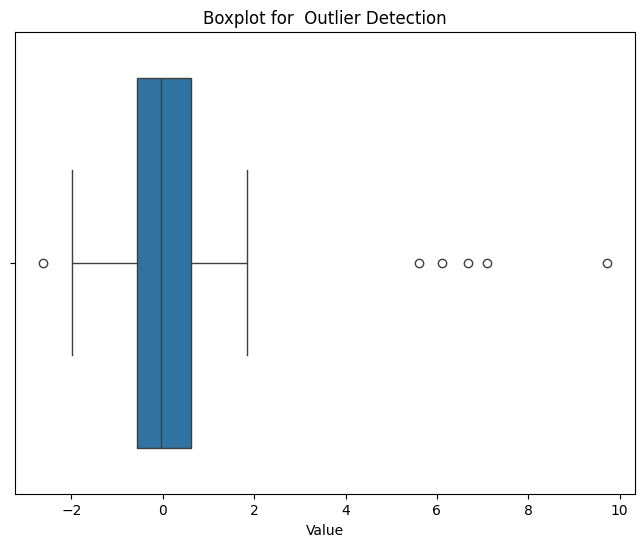

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for  Outlier Detection")
plt.show()


In [20]:
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'],lower_bound,upper_bound)

In [22]:
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lower_bound)&df_removed['Value']<=upper_bound]


In [23]:
df_imputed=df.copy()
median_value=df['Value'].median()
df_imputed['Value']=np.where ((df_imputed['Value']<lower_bound)|(df_imputed['Value']>upper_bound),median_value,df_imputed['Value'])

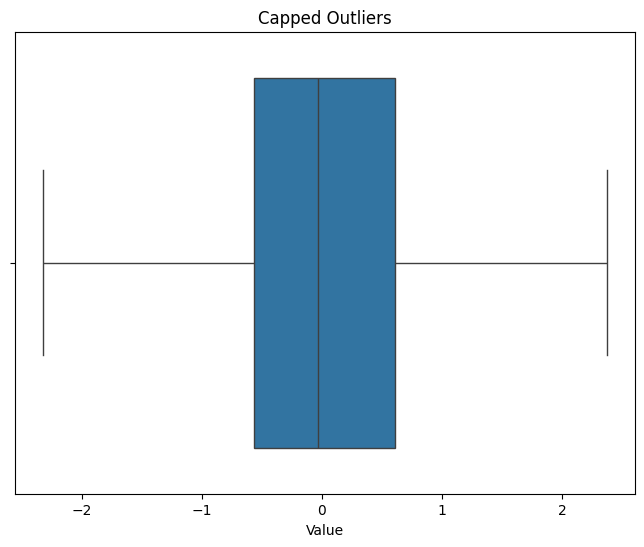

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

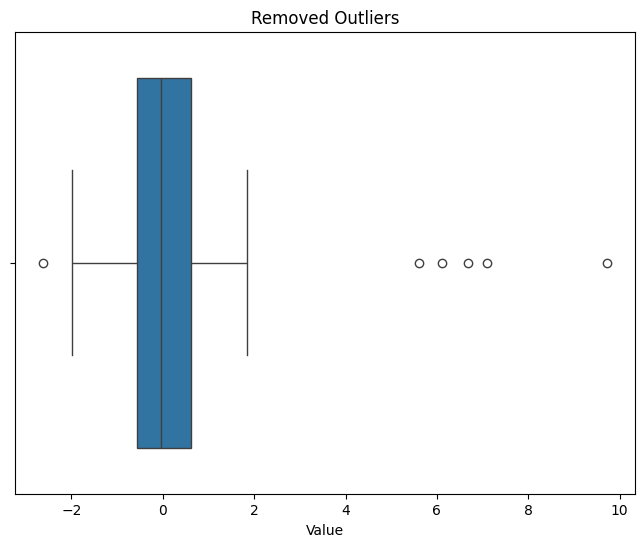

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

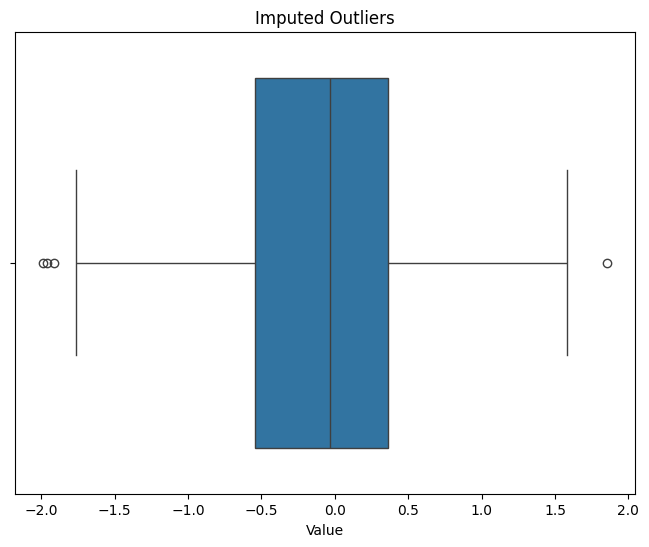

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()

In [28]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-scores:\n{outliers_zscore}")


Outliers detected using IQR:
[0      False
1      False
2      False
3      False
4      False
       ...  
100     True
101     True
102     True
103     True
104     True
Name: Value, Length: 105, dtype: bool]
Outliers detected using Z-scores:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
